In [1]:
import json
import numpy as np
from collections import defaultdict

from matplotlib import pyplot as plt

In [23]:
data[-1]

{'quote': 'weve been writing about climate change being a stress multiplier for many years',
 'dttm': '2020-02-23 22:38:42',
 'speaker': 'Lesley Hughes',
 'num_occurences': 2,
 'gender': ['female'],
 'birth': [None],
 'occupation_ids': [['Q864503']],
 'citizenship_id': ['Q408']}

In [2]:
WIKI_FIELDS = ['gender', 'birth', 'occupation_ids', 'citizenship_id']

def convert_item(item):
    new_item = {}
    new_item['quotation'] = item['q']
    new_item['date'] = item['d']
    new_item['speaker'] = item['s']
    new_item['numOccurrences'] = item['o']
    
    for field in WIKI_FIELDS:
        new_item[field] = item[field]
        new_item[field] = item[field]
        new_item[field] = item[field]
        new_item[field] = item[field]
    return new_item

def select_by_index(item, index):
    item = item.copy()
    
    for field in WIKI_FIELDS:
        item[field] = item[field][index]
    return item

In [3]:
data = []
topic = 'climate change'

# TODO: REMOVE TOPIC (CHANGE RAW DATA)
for line in open('data/union.json'):
    parsed = json.loads(line)
    if topic in parsed['q']:
        data.append(json.loads(line))

data = [convert_item(item) for item in data]
        
with open('data/countries_vocab.json') as f:
    text = f.read()
    
countries = json.loads(text.replace('}{', ','))

with open('data/occupations_vocab.json') as f:
    text = f.read()
    
occupations = json.loads(text.replace('}{', ','))

# Explore the data

In [4]:
data[0]

{'quote': 'the report of the ipcc has once again made it crystal clear climate change is manmade and is accelerating the impact will be dramatic unless we take resolute action',
 'dttm': '2008-10-06 17:57:30',
 'speaker': 'angela merkel',
 'num_occurences': 1,
 'gender': ['female'],
 'birth': ['+1954-07-17T00:00:00Z'],
 'occupation_ids': [['Q82955', 'Q169470', 'Q48352']],
 'citizenship_id': ['Q183']}

In [5]:
# 1. Удаляем объекты, где отсуствуют элементы в массивах (e.g. gender = [])
# 2. Разделяем на 2 массива: первый, где один объект в массиве gender, второй, где несколько

In [6]:
data_single_item = []
data_multiple_items = []
for item in data:
    if len(item['gender']) > 1:
        data_multiple_items.append(item)
    elif len(item['gender']) == 1:
        item = select_by_index(item, 0)
        data_single_item.append(item)

In [7]:
data_multiple_items[0]

{'quote': 'if we dont do that we will in effect just export emissions export our industries export the problem and we will have no discernible effect on climate change around the world',
 'dttm': '2008-09-30 08:12:24',
 'speaker': 'andrew robb',
 'num_occurences': 1,
 'gender': ['male', 'male'],
 'birth': [None, '+1951-08-20T00:00:00Z'],
 'occupation_ids': [['Q33999'], ['Q82955']],
 'citizenship_id': [None, 'Q408']}

In [8]:
len(data_multiple_items), len(data_single_item)

(15480, 44302)

In [9]:
name2occur = defaultdict(int)
for item in data_multiple_items:
    name2occur[item['speaker'].lower()] += 1

In [10]:
sorted(name2occur.items(), key=lambda x: x[1], reverse=True)[:10]

[('john kerry', 430),
 ('gordon brown', 250),
 ('jerry brown', 223),
 ('manmohan singh', 197),
 ('michael mann', 191),
 ('donald trump', 171),
 ('stephen harper', 143),
 ('james hansen', 123),
 ('nicholas stern', 118),
 ('tony abbott', 115)]

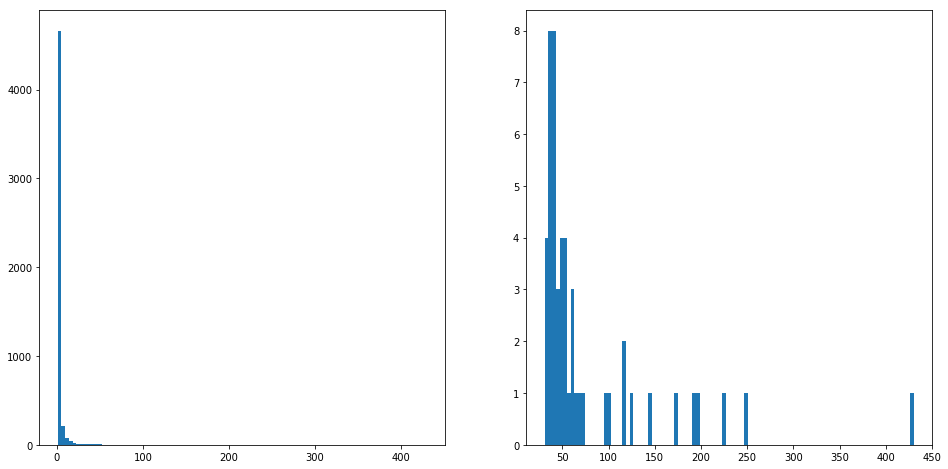

In [11]:
# Distribution of num of quotes

vals = np.array(list(name2occur.values()))

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.hist(vals, bins=100)

plt.subplot(122)
plt.hist(vals[vals > 30], bins=100)
plt.show()

In [12]:
data_multiple_items_new = []


for item in data_multiple_items:
    not_none_ids = []
    for index in range(len(item[WIKI_FIELDS[0]])):
        if all(item[field][index] is not None for field in WIKI_FIELDS):
            not_none_ids.append(index)
    
    if len(not_none_ids) == 1:
        item = select_by_index(item, not_none_ids[0])
        data_single_item.append(item)
    else:
        data_multiple_items_new.append(item)

data_multiple_items = data_multiple_items_new

In [13]:
len(data_multiple_items), len(data_single_item)

(11811, 47971)

In [14]:
name2occur = defaultdict(int)
for item in data_multiple_items:
    name2occur[item['speaker'].lower()] += 1

In [15]:
sorted(name2occur.items(), key=lambda x: x[1], reverse=True)

[('gordon brown', 250),
 ('jerry brown', 223),
 ('michael mann', 191),
 ('donald trump', 171),
 ('james hansen', 123),
 ('nicholas stern', 118),
 ('tony abbott', 115),
 ('lisa jackson', 99),
 ('david cameron', 98),
 ('scott morrison', 73),
 ('jim prentice', 68),
 ('james shaw', 63),
 ('elizabeth may', 60),
 ('tim flannery', 59),
 ('mary robinson', 59),
 ('john connor', 55),
 ('bob brown', 53),
 ('larry fink', 52),
 ('caroline lucas', 51),
 ('xie zhenhua', 51),
 ('harry reid', 49),
 ('president bush', 48),
 ('desmond tutu', 47),
 ('glen murray', 45),
 ('roger johnson', 44),
 ('chris field', 43),
 ("martin o'malley", 42),
 ('helen clark', 41),
 ('phil jones', 41),
 ('david miller', 40),
 ('gregor robertson', 40),
 ('ben rhodes', 40),
 ('richard black', 39),
 ('nick smith', 38),
 ('john holmes', 37),
 ('susan rice', 36),
 ('peter gleick', 36),
 ('bob inglis', 36),
 ('nobuo tanaka', 35),
 ('david king', 34),
 ('harjeet singh', 32),
 ('robert gibbs', 31),
 ('tim cook', 31),
 ('greg clark', 

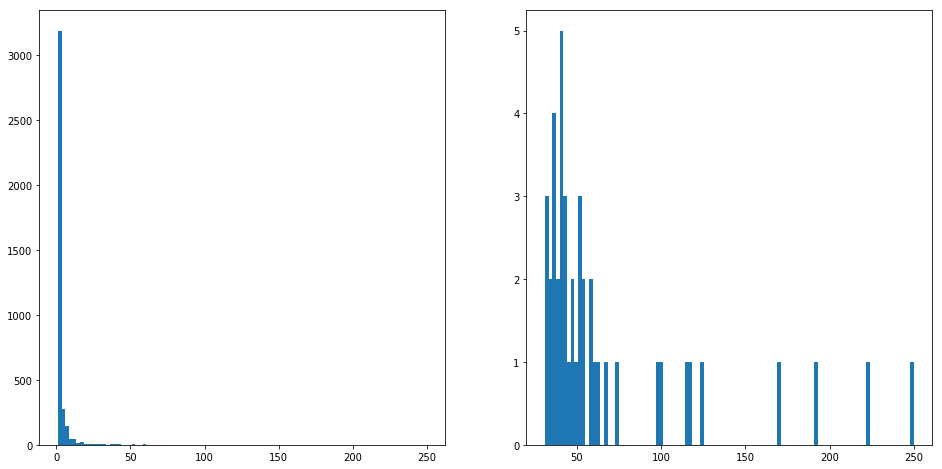

In [22]:
# Distribution of num of quotes

vals = np.array(list(name2occur.values()))

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.hist(vals, bins=100)

plt.subplot(122)
plt.hist(vals[vals > 30], bins=100)
plt.show()

In [16]:
for item in data_multiple_items:
    occ_lengths = [len(occ) if occ is not None else 0 for occ in item['occupation_ids']]
    idx = np.argmax(occ_lengths)
    
    item = select_by_index(item, idx)
    data_single_item.append(item)

In [21]:
with open('data/union_processed.json', 'w') as f:
    f.write(json.dumps(data_single_item))

In [41]:
with open('delete.txt', 'w') as f:
    json.dump(data_single_item[0], f)
    f.write('\n')

In [57]:
with open('delete.txt', 'w') as f:
    for i in range(3):
        json.dump(data_single_item[0], f)
        f.write('\n')
    
#     f.seek(0)
#     selected_rows = []
#     for line in f:
#         selected_rows.append(json.loads(line))

#     f.seek(0)
#     json.dump(selected_rows, f)

In [58]:
with open('delete.txt', 'r') as f:
    res = json.load(f)

JSONDecodeError: Extra data: line 2 column 1 (char 389)

In [56]:
res

[{'quote': 'the report of the ipcc has once again made it crystal clear climate change is manmade and is accelerating the impact will be dramatic unless we take resolute action',
  'dttm': '2008-10-06 17:57:30',
  'speaker': 'angela merkel',
  'num_occurences': 1,
  'gender': 'female',
  'birth': '+1954-07-17T00:00:00Z',
  'occupation_ids': ['Q82955', 'Q169470', 'Q48352'],
  'citizenship_id': 'Q183'},
 {'quote': 'the report of the ipcc has once again made it crystal clear climate change is manmade and is accelerating the impact will be dramatic unless we take resolute action',
  'dttm': '2008-10-06 17:57:30',
  'speaker': 'angela merkel',
  'num_occurences': 1,
  'gender': 'female',
  'birth': '+1954-07-17T00:00:00Z',
  'occupation_ids': ['Q82955', 'Q169470', 'Q48352'],
  'citizenship_id': 'Q183'},
 {'quote': 'the report of the ipcc has once again made it crystal clear climate change is manmade and is accelerating the impact will be dramatic unless we take resolute action',
  'dttm': '